# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_response = city_weather.json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_response['coord']['lat']
        city_lng = city_response['coord']['lon']
        city_max_temp = city_response['main']['temp_max']
        city_humidity = city_response['main']['humidity']
        city_clouds = city_response['clouds']['all']
        city_wind = city_response['wind']['speed']
        city_country = city_response['sys']['country']
        city_date = city_response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hawaiian paradise park
Processing Record 2 of Set 1 | santa rosa del sara
City not found. Skipping...
Processing Record 3 of Set 1 | yoko
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | trairi
Processing Record 7 of Set 1 | nelson bay
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | axim
Processing Record 10 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 11 of Set 1 | noumea
Processing Record 12 of Set 1 | ust-nera
Processing Record 13 of Set 1 | aromashevo
Processing Record 14 of Set 1 | tromso
Processing Record 15 of Set 1 | vadso
Processing Record 16 of Set 1 | qapqal
City not found. Skipping...
Processing Record 17 of Set 1 | lazaro cardenas
Processing Record 18 of Set 1 | kailua-kona
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | saipan
Processing Record

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.5933,-154.9731,21.13,98,89,4.03,US,1712772242
1,yoko,5.5333,12.3167,24.24,61,90,2.15,CM,1712772242
2,ushuaia,-54.8000,-68.3000,8.79,66,40,13.38,AR,1712772195
3,ribeira grande,38.5167,-28.7000,16.54,100,75,6.26,PT,1712772243
4,trairi,-3.2778,-39.2689,27.75,86,100,3.61,BR,1712772059


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,21.13,98,89,4.03,US,1712772242
1,yoko,5.5333,12.3167,24.24,61,90,2.15,CM,1712772242
2,ushuaia,-54.8000,-68.3000,8.79,66,40,13.38,AR,1712772195
3,ribeira grande,38.5167,-28.7000,16.54,100,75,6.26,PT,1712772243
4,trairi,-3.2778,-39.2689,27.75,86,100,3.61,BR,1712772059


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

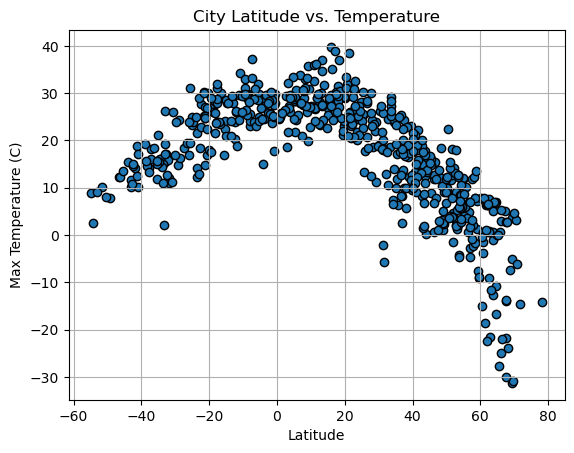

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Max Temp"].astype("float")
plt.scatter(x_values, y_values, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

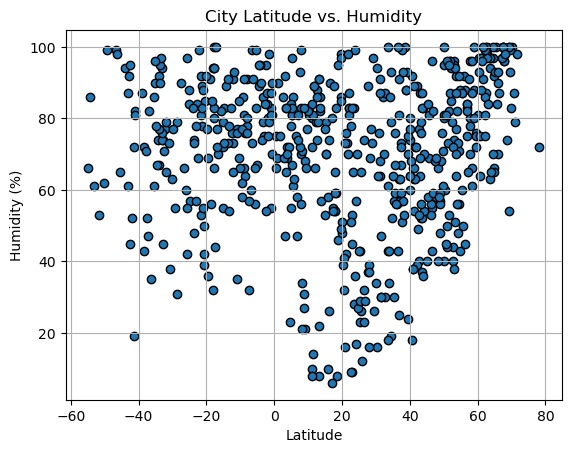

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"].astype("float")
humidity_values = city_data_df["Humidity"].astype("float")
plt.scatter(x_values, humidity_values, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

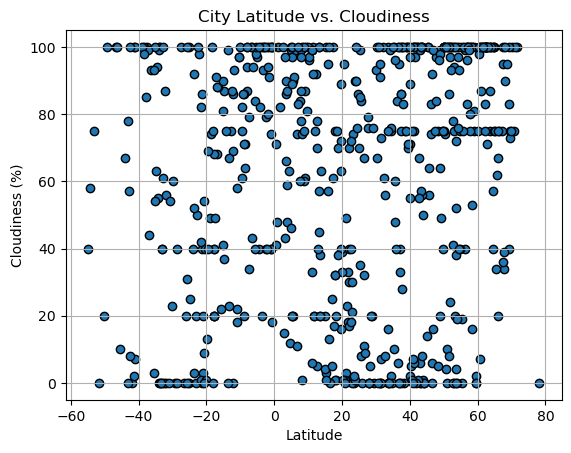

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"].astype("float")
cloudiness_values = city_data_df["Cloudiness"].astype("float")
plt.scatter(x_values, cloudiness_values, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

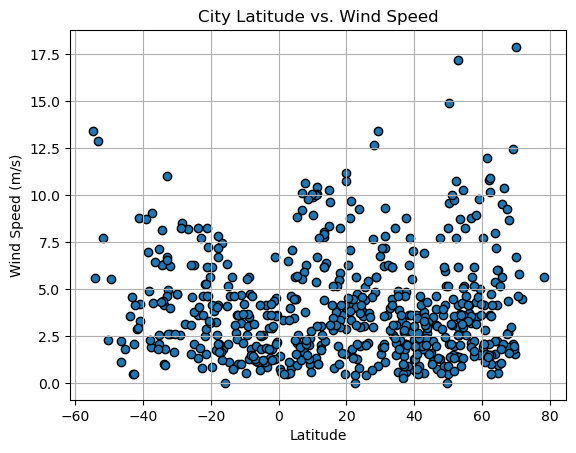

In [12]:
# Build the scatter plots for latitude vs. Wind Speed
x_values = city_data_df["Lat"].astype("float")
windspeed_values = city_data_df["Wind Speed"].astype("float")
plt.scatter(x_values, windspeed_values, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,21.13,98,89,4.03,US,1712772242
1,yoko,5.5333,12.3167,24.24,61,90,2.15,CM,1712772242
3,ribeira grande,38.5167,-28.7000,16.54,100,75,6.26,PT,1712772243
6,ilulissat,69.2167,-51.1000,-4.99,54,40,2.06,GL,1712772243
7,axim,4.8699,-2.2405,29.00,78,99,4.46,GH,1712772243


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ushuaia,-54.8000,-68.3000,8.79,66,40,13.38,AR,1712772195
4,trairi,-3.2778,-39.2689,27.75,86,100,3.61,BR,1712772059
5,nelson bay,-32.7167,152.1500,17.22,74,61,4.92,AU,1712772243
8,noumea,-22.2763,166.4572,27.78,99,98,4.64,NC,1712771775
15,blackmans bay,-43.0167,147.3167,10.07,87,78,0.45,AU,1712772244


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7104724296576638


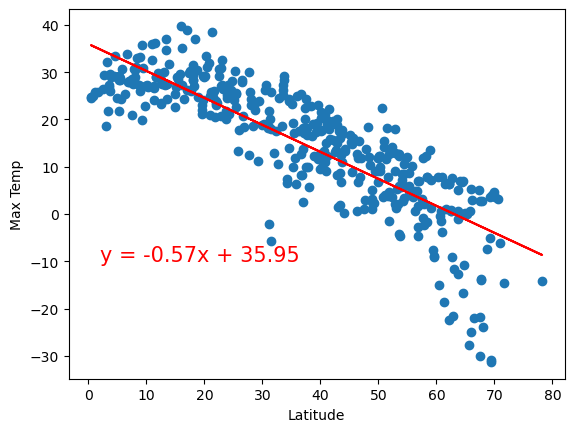

In [16]:
# Linear regression on Northern Hemisphere
lat_north = northern_hemi_df['Lat'].astype("float")
temp_north = northern_hemi_df['Max Temp'].astype("float")


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, temp_north)
regress_values = lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_north, temp_north)
plt.plot(lat_north, regress_values,"r-")
plt.annotate(line_eq,(2,-10),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"R squared: {rvalue**2}")

plt.show()


R squared: 0.6069442133074899


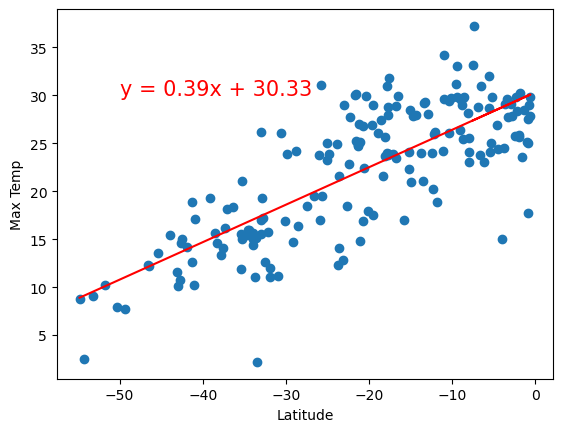

In [17]:
# Linear regression on Southern Hemisphere
lat_south = southern_hemi_df['Lat'].astype("float")
temp_south = southern_hemi_df['Max Temp'].astype("float")


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south, temp_south)
regress_values = lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_south, temp_south)
plt.plot(lat_south, regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"R squared: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.08797336097795973


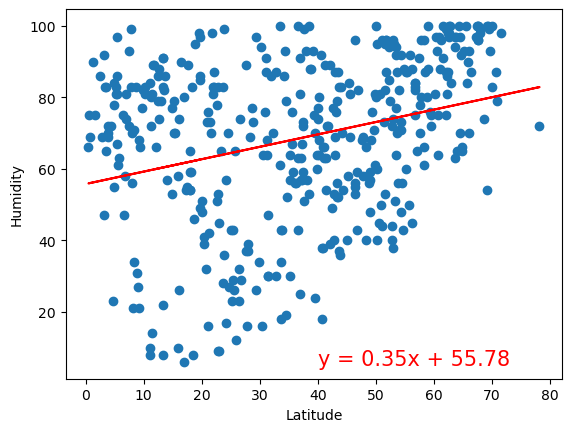

In [18]:
# Northern Hemisphere
lat_north = northern_hemi_df['Lat'].astype("float")
humdidity_north = northern_hemi_df['Humidity'].astype("float")


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, humdidity_north)
regress_values = lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_north, humdidity_north)
plt.plot(lat_north, regress_values,"r-")
plt.annotate(line_eq,(40,5),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"R squared: {rvalue**2}")

plt.show()

R squared: 0.015107929393118934


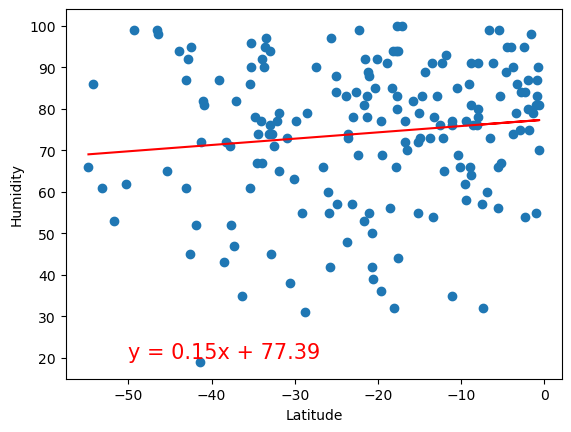

In [19]:
# Southern Hemisphere
lat_south = southern_hemi_df['Lat'].astype("float")
humdidity_south = southern_hemi_df['Humidity'].astype("float")


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south, humdidity_south)
regress_values = lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_south, humdidity_south)
plt.plot(lat_south, regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"R squared: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.025537494124445868


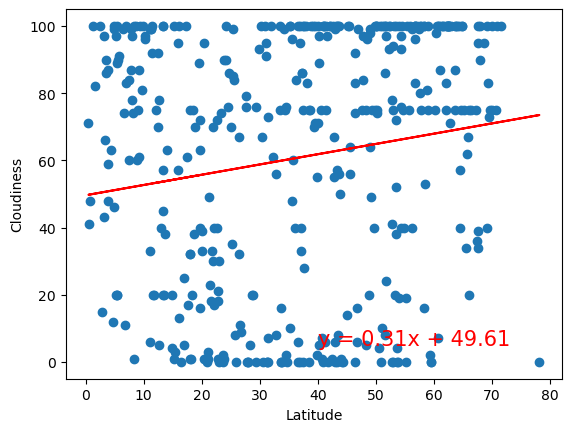

In [20]:
# Northern Hemisphere
lat_north = northern_hemi_df['Lat'].astype("float")
cloudiness_north = northern_hemi_df['Cloudiness'].astype("float")


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, cloudiness_north)
regress_values = lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_north, cloudiness_north)
plt.plot(lat_north, regress_values,"r-")
plt.annotate(line_eq,(40,5),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"R squared: {rvalue**2}")

plt.show()

R squared: 0.04379006943084652


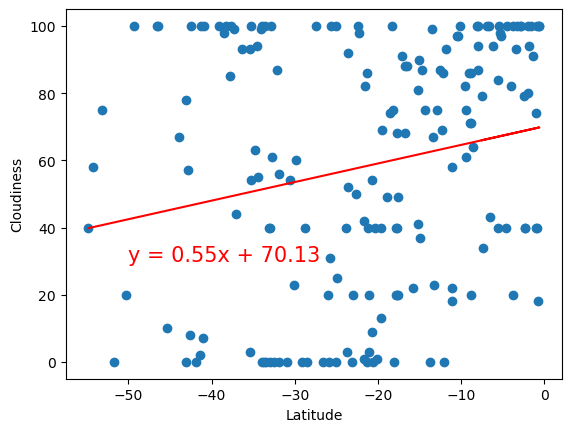

In [25]:
# Southern Hemisphere
lat_south = southern_hemi_df['Lat'].astype("float")
cloudiness_south = southern_hemi_df['Cloudiness'].astype("float")


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south, cloudiness_south)
regress_values = lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_south, cloudiness_south)
plt.plot(lat_south, regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"R squared: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.0004024670216566608


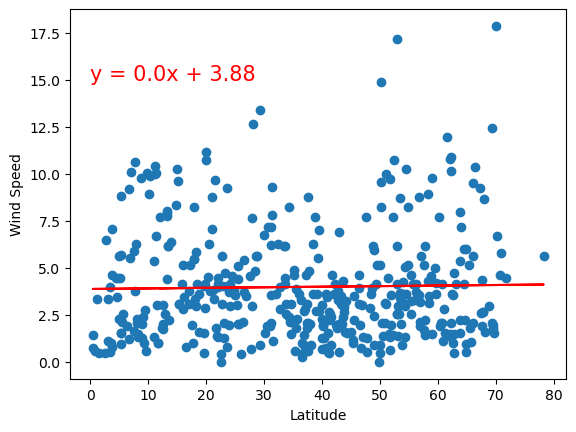

In [29]:
# Northern Hemisphere
lat_north = northern_hemi_df['Lat'].astype("float")
windspeed_north = northern_hemi_df['Wind Speed'].astype("float")


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, windspeed_north)
regress_values = lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_north, windspeed_north)
plt.plot(lat_north, regress_values,"r-")
plt.annotate(line_eq,(0,15),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"R squared: {rvalue**2}")

plt.show()

R squared: 0.1219822230883615


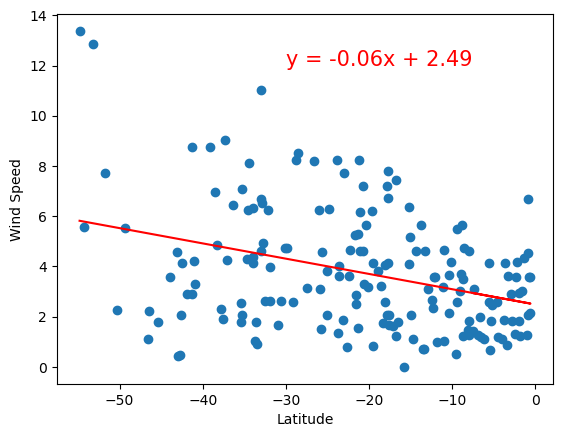

In [31]:
# Southern Hemisphere
lat_south = southern_hemi_df['Lat'].astype("float")
windspeed_south = southern_hemi_df['Wind Speed'].astype("float")


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south, windspeed_south)
regress_values = lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_south, windspeed_south)
plt.plot(lat_south, regress_values,"r-")
plt.annotate(line_eq,(-30,12),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"R squared: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE